<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Assignment_13_SVM_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score



In [3]:
train = pd.read_csv("SalaryData_Train(1).csv")
test = pd.read_csv("SalaryData_Test(1).csv")

In [4]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
train.describe().T

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
test.describe().T

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [8]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [11]:
columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]
for i in columns:
        train[i]= LE.fit_transform(train[i])
        test[i]= LE.fit_transform(test[i])

In [28]:
train['Salary1']= pd.get_dummies(train['Salary'], drop_first=True)
test['Salary1']= pd.get_dummies(test['Salary'], drop_first=True)

In [13]:
corr= train.corr()

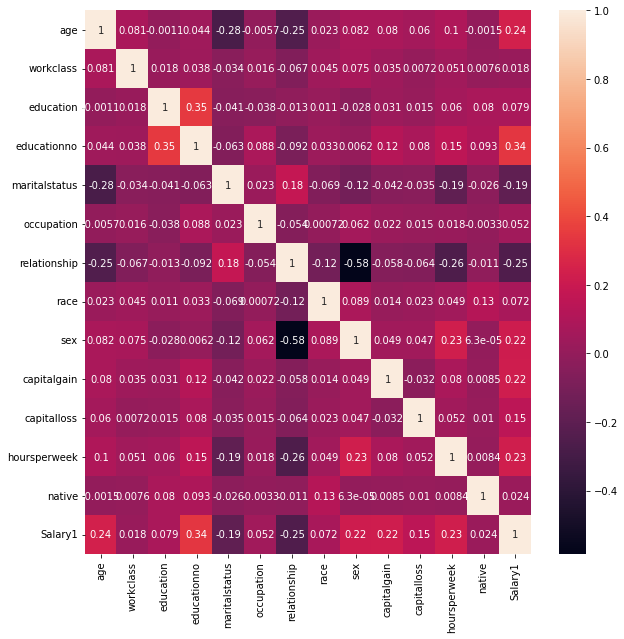

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

salary has positive relation with education,hours per week,age

In [15]:
colnames = train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary', 'Salary1'],
      dtype='object')

In [29]:
x_train = train[colnames[0:13]]
y_train = train[colnames[14]]
x_test = test[colnames[0:13]]
y_test = test[colnames[14]]

In [31]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [32]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((30161, 13), (30161,), (15060, 13), (15060,))

### Grid Search CV

In [40]:
# Applying different Kernel Models
# Kernel = lin
clf_lin = SVC()
param_grid_lin = [{'kernel':['linear']}]
gsv_lin = GridSearchCV(clf_lin,param_grid_lin,cv=5)
gsv_lin.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid=[{'kernel': ['linear']}])

In [41]:
gsv_lin.best_params_ , gsv_lin.best_score_ 

({'kernel': 'linear'}, 0.811942538848007)

In [42]:
clf_lin = SVC(C= 10, gamma = 0.5)
clf_lin.fit(x_train , y_train)
y_pred_lin = clf_lin.predict(x_test)
acc = accuracy_score(y_test, y_pred_lin) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred_lin)

Accuracy = 84.26958831341301


array([[10581,   779],
       [ 1590,  2110]])

In [38]:
# Kernel = poly
clf_poly = SVC()
param_grid_poly = [{'kernel':['poly']}]
gsv_poly = GridSearchCV(clf_poly,param_grid_poly,cv=5)
gsv_poly.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid=[{'kernel': ['poly']}])

In [37]:
gsv_poly.best_params_ , gsv_poly.best_score_ 

({'kernel': 'poly'}, 0.8428767112446531)

In [39]:
clf_poly = SVC(C= 10, gamma = 0.5)
clf_poly.fit(x_train , y_train)
y_pred_poly = clf_poly.predict(x_test)
acc = accuracy_score(y_test, y_pred_poly) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred_poly)

Accuracy = 84.26958831341301


array([[10581,   779],
       [ 1590,  2110]])

In [33]:
# Kernel = rbf
clf_rbf = SVC()
param_grid_rbf = [{'kernel':['rbf'],'gamma':[5,0.5],'C':[20,10,0.1]}]
gsv_rbf = GridSearchCV(clf_rbf,param_grid_rbf,cv=5)
gsv_rbf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [20, 10, 0.1], 'gamma': [5, 0.5],
                          'kernel': ['rbf']}])

In [34]:
gsv_rbf.best_params_ , gsv_rbf.best_score_ 

({'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}, 0.8440371337396749)

In [35]:
clf_rbf = SVC(C= 10, gamma = 0.5)
clf_rbf.fit(x_train , y_train)
y_pred_rbf = clf_rbf.predict(x_test)
acc = accuracy_score(y_test, y_pred_rbf) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred_rbf)

Accuracy = 84.26958831341301


array([[10581,   779],
       [ 1590,  2110]])

kernel rbf model has the highest accuracy 84%